<a href="https://www.kaggle.com/code/abdallhwerby/eda-and-prediction-of-life-expectancy?scriptVersionId=110684623" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Life expectancy is a statistical measure of the average time an organism is expected to live, based on the year of its birth, current age, and other demographic factors like sex.

# Human beings are expected to live on average 30–40 years in Eswatini and 82.6 years in Japan, why is that?

# We are here to investigate the factors that affect life expectancy in different countries, and to predict the life expectancy in the future, along with how to improve it.

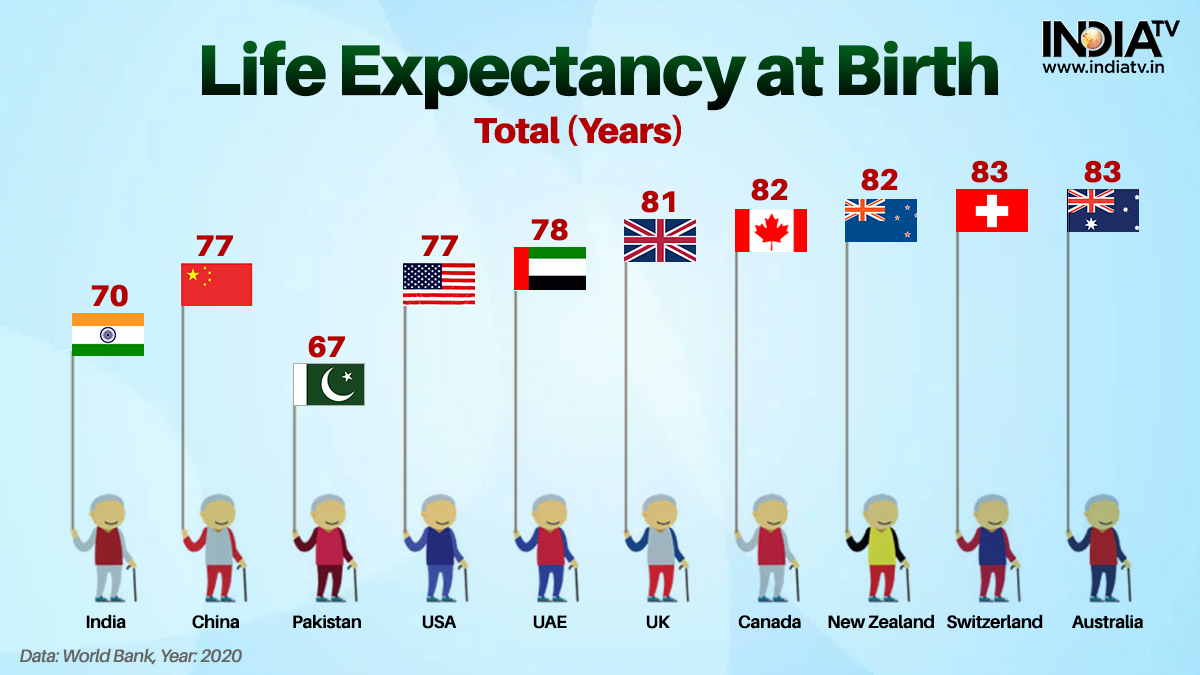

# <b>1 <span style='color:#4285f4'>|</span> Importing libraries</b>
- **For ML Models**: Tensorflow, keras
- **For Data Manipulation**: numpy, pandas, sklearn
- **For Data Visualization**: matplotlib, seaborn,plotly

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')

# <b>2 <span style='color:#4285f4'>|</span> Reading the Dataset</b>

In [2]:
df = pd.read_csv(r'../input/life-expectancy-with-separated-columns/Life_Expectancy.csv')

# <b>3 <span style='color:#4285f4'>|</span> EDA </b>

In [3]:
df.head()

,Country,Year,Continent,Least Developed,Life Expectancy,Population,CO2 emissions,Health expenditure,Electric power consumption,Forest area,GDP per capita,Individuals using the Internet,Military expenditure,People practicing open defecation,People using at least basic drinking water services,Obesity among adults,Beer consumption per capita
0,Albania,2000,Europe,False,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431
1,Albania,2001,Europe,False,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995
2,Albania,2002,Europe,False,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697
3,Albania,2003,Europe,False,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830
4,Albania,2004,Europe,False,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country                                              1904 non-null   object 
 1   Year                                                 1904 non-null   int64  
 2   Continent                                            1904 non-null   object 
 3   Least Developed                                      1904 non-null   bool   
 4   Life Expectancy                                      1904 non-null   float64
 5   Population                                           1904 non-null   int64  
 6   CO2 emissions                                        1904 non-null   float64
 7   Health expenditure                                   1904 non-null   float64
 8   Electric power consumption                           1904 non-null  

In [5]:
df.columns

Index(['Country', 'Year', 'Continent', 'Least Developed', 'Life Expectancy',
       'Population', 'CO2 emissions', 'Health expenditure',
       'Electric power consumption', 'Forest area', 'GDP per capita',
       'Individuals using the Internet', 'Military expenditure',
       'People practicing open defecation',
       'People using at least basic drinking water services',
       'Obesity among adults', 'Beer consumption per capita'],
      dtype='object')

## Columns explanation:


### Country:

- **Country**: 119 countries names.
- **Year**: from 2000 to 2015 (both included).
- **Continent**: names of the different continents (6 continets: Europe, Asia, Africa, North America, South America, Oceania).
- **Least Developed**: if the value is TRUE, the country is classified as "Least Developed", if it is FALSE, the country isn't classified as "Least Developed". 
- **Population**: the total number of inhabitants in a country.
- **CO2 emissions**: the total amount of carbon dioxide (CO2) emitted by a country.
- **Electric power consumption**: the total amount of electricity consumed by a country.
- **Forest area**: the total area of forest in a country.
- **GDP per capita**: the gross domestic product (GDP) per person in a country.
- **Military expenditure**: the total amount of money spent on military in a country.


### Humans:

- **Obesity among adults**: the percentage of adults who are obese in a country.
- **People using at least basic drinking water services**: the total number of people using at least basic drinking water services in a country.
- **People practicing open defecation**: the total number of people practicing open defecation in a country.
- **Individuals using the Internet**: the total number of people using the Internet in a country.
- **Beer consumption per capita**: the total amount of beer consumed per person in a country.
- **Health expenditure**: the total amount of money spent on health care in a country.




### Label:

- **Life Expectancy**: the average number of years a newborn child would live if current mortality patterns were to stay the same.


## Are there any missing values?

In [6]:
print(df.isnull().values.any())


False


### No, there are no missing values in the dataset.

## Are there any duplicated values?

In [7]:
df.duplicated().sum()


0

### No, there are no duplicated values in the dataset.

# <b>3.2 <span style='color:#4285f4'>|</span> Visualisation </b>

## To undrrstand the human's life expectancy better, we will investigate the columns relationship with the label.

<AxesSubplot:>

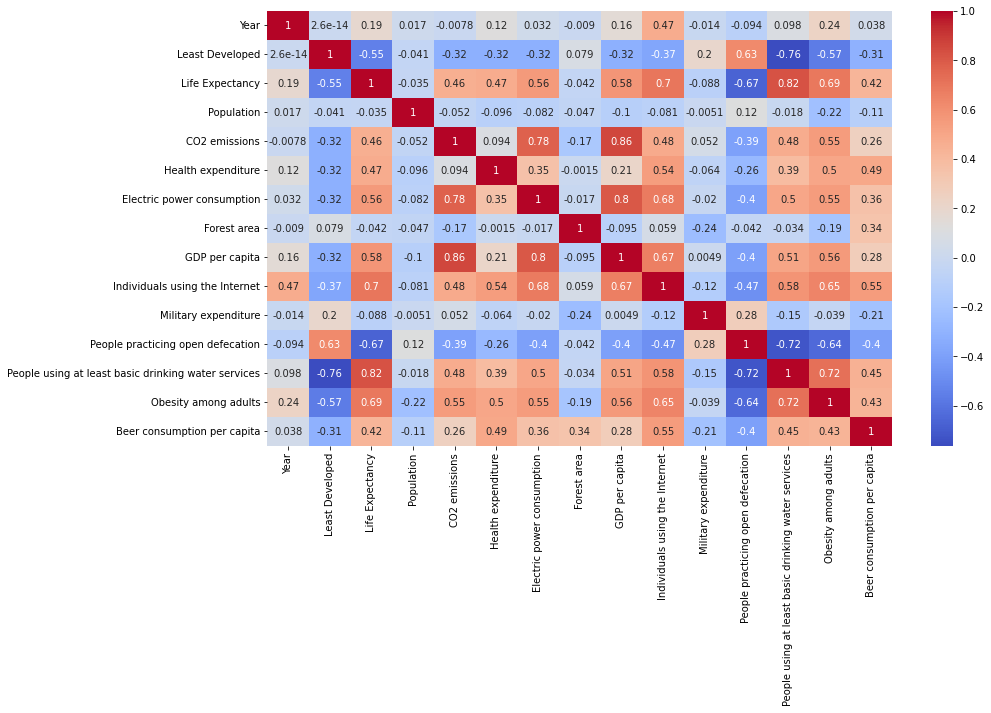

In [8]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

##### As we can see, the label is highly correlated with the following columns:
- **GDP per capita**
- **Health expenditure**
- **Obesity among adults**
- **Least Developed**
- **People using at least basic drinking water services**
- **People practicing open defecation**
- **Individuals using the Internet**



In [9]:
df_map = df.copy()

In [10]:
# remove duplicates in countries column
df_map = df_map.drop_duplicates(subset=['Country'], keep='first')


## heat Map of the world according to life expectancy

In [11]:
fig = px.choropleth(df_map, locations="Country", locationmode='country names', color="Life Expectancy", hover_name="Country", range_color=[0,100])
fig.update_layout(title_text = 'Life Expectancy by Country', title_x = 0.5)
fig.show()


## Can country development be a factor in life expectancy? 

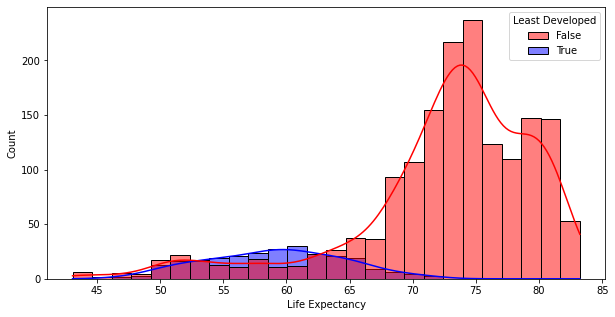

In [12]:
plt.figure(figsize=(10,5))
palette = ['red', 'blue']
sns.histplot(x='Life Expectancy',hue= 'Least Developed', data= df, palette=palette, kde=True);

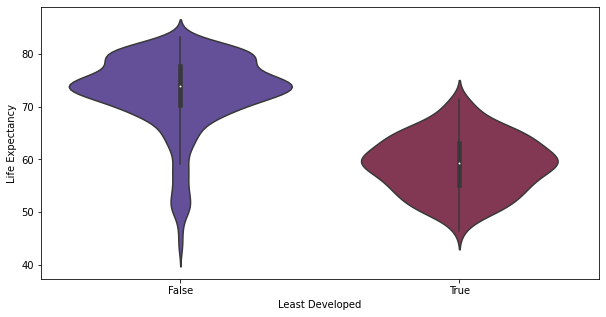

In [13]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Least Developed', y='Life Expectancy', data=df, palette='twilight');


#### As we can see from the graph, the countries with the highest life expectancy are the developed countries, and the countries with the lowest life expectancy are the least developed countries.

### Can country's population be a factor in life expectancy?

In [14]:
fig = px.scatter(df_map, x="Population", y="Life Expectancy", color="Least Developed", size='Population', hover_name="Country", log_x=True, size_max=60)
fig.update_layout(title_text='Population vs Life Expectancy', title_x=0.5)
fig.show()



#### As we can see increasing in population for developing countries, the life expectancy is decreasing, and for developed countries, the life expectancy is increasing with population.

## Bu is there an improvement in life expectancy over the years?

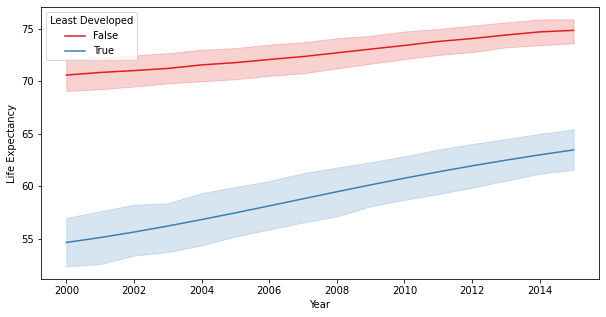

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Life Expectancy', hue='Least Developed', data=df, palette = 'Set1');


In [16]:
fig=px.line(df.sort_values(by='Year'),x='Year',y='Life Expectancy',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
fig.show()

### As we can see in the line chart, the life expectancy is increasing over the years.


## Can forest area in a country be a factor in life expectancy?

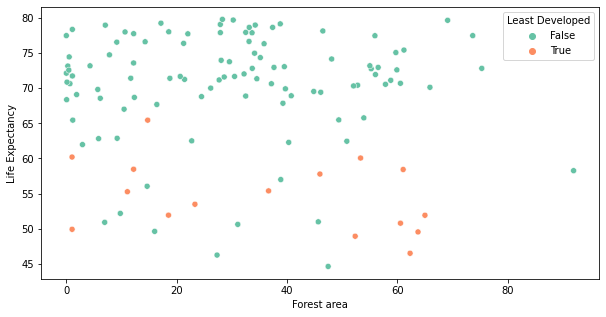

In [17]:
# Forest area vs Life Expectancy
plt.figure(figsize=(10,5))
sns.scatterplot(x='Forest area', y='Life Expectancy', hue='Least Developed', data=df_map, palette = 'Set2');

# As we can see, forest area has no effect on life expectancy.

In [18]:
# plotly CO2 emissions vs Life Expectancy
fig = px.scatter(df_map, x="CO2 emissions", y="Life Expectancy", color="Least Developed", size='CO2 emissions', hover_name="Country", log_x=True, size_max=60)
fig.update_layout(title_text='CO2 emissions vs Life Expectancy', title_x=0.5)
fig.show()

#### As we can see CO2 emissions come from countries with highest petroleum industry, and it actually has an effect on life expectancy.

# GDP vs Life Expectancy

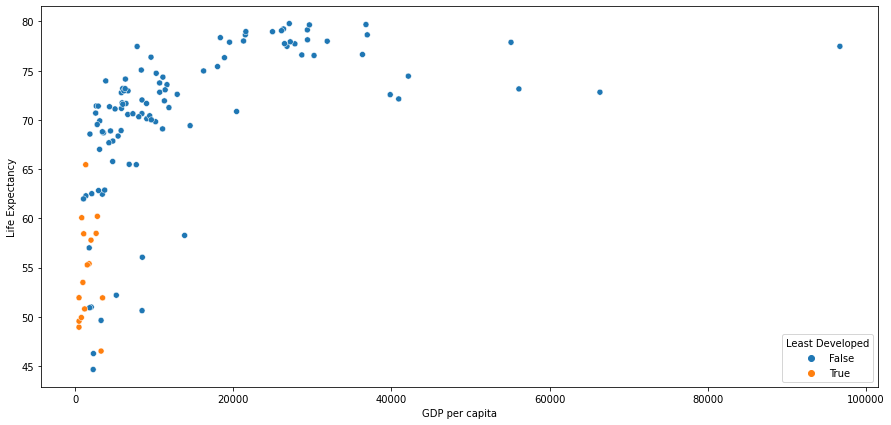

In [19]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='GDP per capita', y='Life Expectancy', hue='Least Developed', data=df_map);

#### As we can see GDP has a high effect on life expectancy as with more GDP, the country is considered developed.


In [20]:
df.columns

Index(['Country', 'Year', 'Continent', 'Least Developed', 'Life Expectancy',
       'Population', 'CO2 emissions', 'Health expenditure',
       'Electric power consumption', 'Forest area', 'GDP per capita',
       'Individuals using the Internet', 'Military expenditure',
       'People practicing open defecation',
       'People using at least basic drinking water services',
       'Obesity among adults', 'Beer consumption per capita'],
      dtype='object')

# obestic rate vs Life Expectancy


<Figure size 1080x360 with 0 Axes>

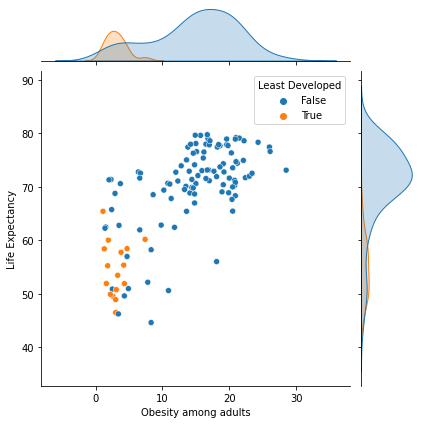

In [21]:
plt.figure(figsize=(15,5))
sns.jointplot(x='Obesity among adults',y='Life Expectancy', hue='Least Developed', data=df_map, palette = 'tab10');

# People ability to use water realtion with life expectancy:

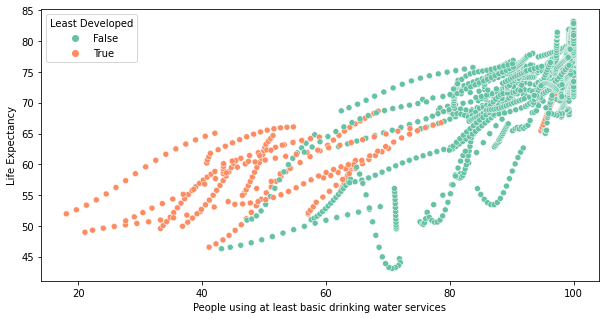

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='People using at least basic drinking water services', y='Life Expectancy', hue='Least Developed', data=df, palette = 'Set2');


#### As we can see, the countries with the highest life expectancy are the countries with the highest ability to use water.

## People practicing open defecation vs Life Expectancy?

<Figure size 1080x360 with 0 Axes>

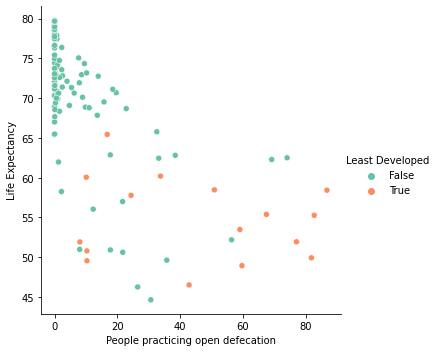

In [23]:
plt.figure(figsize=(15,5))
sns.relplot(x='People practicing open defecation', y='Life Expectancy', hue='Least Developed', data=df_map, palette = 'Set2');

#### As we can see, the countries with ability to use the bathroom have the highest life expectancy.

## Using label encoder to convert categorical data to numerical data


# <b>3-2 <span style='color:#4285f4'>|</span> Encoding data </b>

In [24]:
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Least Developed'] = le.fit_transform(df['Least Developed'])
df['Continent'] = le.fit_transform(df['Continent'])

# <b>4 <span style='color:#4285f4'>|</span> Splitting data </b>

In [25]:
X = df.drop(['Life Expectancy'], axis=1)
y = df['Life Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# <b>5 <span style='color:#4285f4'>|</span> Scaling the data </b>

In [26]:
# use robust scaler to scale the data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# <b>6 <span style='color:#4285f4'>|</span> ML Models </b>

## Table of models and their scores

In [27]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Train Score", "Test Score", "R2 Score", "Mean Absolute Error", "Mean Squared Error"]

# <b>6.1 <span style='color:#4285f4'>|</span> Lasso regression </b>

In [28]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)
lasso_r2_score = r2_score(y_test, lasso.predict(X_test))
lasso_mae = mean_absolute_error(y_test, lasso.predict(X_test))
lasso_mse = mean_squared_error(y_test, lasso.predict(X_test))
x.add_row(["Lasso Regression", lasso_train_score, lasso_test_score, lasso_r2_score, lasso_mae, lasso_mse])

print(x)


+------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|      Model       |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error | Mean Squared Error |
+------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
| Lasso Regression | 0.7529582439824193 | 0.7427415711583469 | 0.7427415711583469 |  3.032623258153396  | 17.669882454735145 |
+------------------+--------------------+--------------------+--------------------+---------------------+--------------------+


# <b>6.2 <span style='color:#4285f4'>|</span>  Linear Regression </b>

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
lr_r2_score = r2_score(y_test, lr.predict(X_test))
lr_mae = mean_absolute_error(y_test, lr.predict(X_test))
lr_mse = mean_squared_error(y_test, lr.predict(X_test))
x.add_row(["Linear Regression", lr_train_score, lr_test_score, lr_r2_score, lr_mae, lr_mse])

print(x)


+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|       Model       |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error | Mean Squared Error |
+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|  Lasso Regression | 0.7529582439824193 | 0.7427415711583469 | 0.7427415711583469 |  3.032623258153396  | 17.669882454735145 |
| Linear Regression | 0.831046814750498  | 0.8173151896848815 | 0.8173151896848815 |  2.7533436316231428 | 12.547768168640381 |
+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+


# <b>6.3 <span style='color:#4285f4'>|</span> Ridge regression </b>

In [30]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_train_score = ridge.score(X_train, y_train)
ridge_test_score = ridge.score(X_test, y_test)
ridge_r2_score = r2_score(y_test, ridge.predict(X_test))
ridge_mae = mean_absolute_error(y_test, ridge.predict(X_test))
ridge_mse = mean_squared_error(y_test, ridge.predict(X_test))
x.add_row(["Ridge Regression", ridge_train_score, ridge_test_score, ridge_r2_score, ridge_mae, ridge_mse])

print(x)

+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|       Model       |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error | Mean Squared Error |
+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|  Lasso Regression | 0.7529582439824193 | 0.7427415711583469 | 0.7427415711583469 |  3.032623258153396  | 17.669882454735145 |
| Linear Regression | 0.831046814750498  | 0.8173151896848815 | 0.8173151896848815 |  2.7533436316231428 | 12.547768168640381 |
|  Ridge Regression | 0.8310400004169732 | 0.8173671527659265 | 0.8173671527659265 |  2.751901050787223  | 12.544199066791368 |
+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+


# <b>6.4 <span style='color:#4285f4'>|</span> Ada Boost regressor </b>

In [31]:
abr = AdaBoostRegressor()
abr.fit(X_train, y_train)
abr_train_score = abr.score(X_train, y_train)
abr_test_score = abr.score(X_test, y_test)
abr_r2_score = r2_score(y_test, abr.predict(X_test))
abr_mae = mean_absolute_error(y_test, abr.predict(X_test))
abr_mse = mean_squared_error(y_test, abr.predict(X_test))
x.add_row(["Ada Boost Regressor", abr_train_score, abr_test_score, abr_r2_score, abr_mae, abr_mse])

print(x)

+---------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|        Model        |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error | Mean Squared Error |
+---------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|   Lasso Regression  | 0.7529582439824193 | 0.7427415711583469 | 0.7427415711583469 |  3.032623258153396  | 17.669882454735145 |
|  Linear Regression  | 0.831046814750498  | 0.8173151896848815 | 0.8173151896848815 |  2.7533436316231428 | 12.547768168640381 |
|   Ridge Regression  | 0.8310400004169732 | 0.8173671527659265 | 0.8173671527659265 |  2.751901050787223  | 12.544199066791368 |
| Ada Boost Regressor | 0.919764762990364  | 0.912699946653477  | 0.912699946653477  |  1.9902809495236495 | 5.996233778892645  |
+---------------------+--------------------+--------------------+--------------------+----

# <b>6.5 <span style='color:#4285f4'>|</span> Gradient Boosting Regressor </b>

In [32]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_train_score = gbr.score(X_train, y_train)
gbr_test_score = gbr.score(X_test, y_test)
gbr_r2_score = r2_score(y_test, gbr.predict(X_test))
gbr_mae = mean_absolute_error(y_test, gbr.predict(X_test))
gbr_mse = mean_squared_error(y_test, gbr.predict(X_test))
x.add_row(["Gradient Boosting Regressor", gbr_train_score, gbr_test_score, gbr_r2_score, gbr_mae, gbr_mse])

print(x)


+-----------------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|            Model            |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error | Mean Squared Error |
+-----------------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|       Lasso Regression      | 0.7529582439824193 | 0.7427415711583469 | 0.7427415711583469 |  3.032623258153396  | 17.669882454735145 |
|      Linear Regression      | 0.831046814750498  | 0.8173151896848815 | 0.8173151896848815 |  2.7533436316231428 | 12.547768168640381 |
|       Ridge Regression      | 0.8310400004169732 | 0.8173671527659265 | 0.8173671527659265 |  2.751901050787223  | 12.544199066791368 |
|     Ada Boost Regressor     | 0.919764762990364  | 0.912699946653477  | 0.912699946653477  |  1.9902809495236495 | 5.996233778892645  |
| Gradient Boosting Regressor | 0.

# <b>6.6 <span style='color:#4285f4'>|</span> Random Forest Regressor </b>

In [33]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_train_score = rfr.score(X_train, y_train)
rfr_test_score = rfr.score(X_test, y_test)
rfr_r2_score = r2_score(y_test, rfr.predict(X_test))
rfr_mae = mean_absolute_error(y_test, rfr.predict(X_test))
rfr_mse = mean_squared_error(y_test, rfr.predict(X_test))
x.add_row(["Random Forest Regressor", rfr_train_score, rfr_test_score, rfr_r2_score, rfr_mae, rfr_mse])

print(x)


+-----------------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|            Model            |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error | Mean Squared Error |
+-----------------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|       Lasso Regression      | 0.7529582439824193 | 0.7427415711583469 | 0.7427415711583469 |  3.032623258153396  | 17.669882454735145 |
|      Linear Regression      | 0.831046814750498  | 0.8173151896848815 | 0.8173151896848815 |  2.7533436316231428 | 12.547768168640381 |
|       Ridge Regression      | 0.8310400004169732 | 0.8173671527659265 | 0.8173671527659265 |  2.751901050787223  | 12.544199066791368 |
|     Ada Boost Regressor     | 0.919764762990364  | 0.912699946653477  | 0.912699946653477  |  1.9902809495236495 | 5.996233778892645  |
| Gradient Boosting Regressor | 0.

# <b>6.7 <span style='color:#4285f4'>|</span> Decision Tree Regressor </b>

In [34]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_train_score = dtr.score(X_train, y_train)
dtr_test_score = dtr.score(X_test, y_test)
dtr_r2_score = r2_score(y_test, dtr.predict(X_test))
dtr_mae = mean_absolute_error(y_test, dtr.predict(X_test))
dtr_mse = mean_squared_error(y_test, dtr.predict(X_test))
x.add_row(["Decision Tree Regressor", dtr_train_score, dtr_test_score, dtr_r2_score, dtr_mae, dtr_mse])

print(x)

+-----------------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|            Model            |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error | Mean Squared Error |
+-----------------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|       Lasso Regression      | 0.7529582439824193 | 0.7427415711583469 | 0.7427415711583469 |  3.032623258153396  | 17.669882454735145 |
|      Linear Regression      | 0.831046814750498  | 0.8173151896848815 | 0.8173151896848815 |  2.7533436316231428 | 12.547768168640381 |
|       Ridge Regression      | 0.8310400004169732 | 0.8173671527659265 | 0.8173671527659265 |  2.751901050787223  | 12.544199066791368 |
|     Ada Boost Regressor     | 0.919764762990364  | 0.912699946653477  | 0.912699946653477  |  1.9902809495236495 | 5.996233778892645  |
| Gradient Boosting Regressor | 0.

# <b>6.8 <span style='color:#4285f4'>|</span>  XG Boost Regressor </b>

In [35]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_train_score = xgb.score(X_train, y_train)
xgb_test_score = xgb.score(X_test, y_test)
xgb_r2_score = r2_score(y_test, xgb.predict(X_test))
xgb_mae = mean_absolute_error(y_test, xgb.predict(X_test))
xgb_mse = mean_squared_error(y_test, xgb.predict(X_test))
x.add_row(["XG Boost Regressor", xgb_train_score, xgb_test_score, xgb_r2_score, xgb_mae, xgb_mse])


print(x)



+-----------------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|            Model            |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error | Mean Squared Error |
+-----------------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|       Lasso Regression      | 0.7529582439824193 | 0.7427415711583469 | 0.7427415711583469 |  3.032623258153396  | 17.669882454735145 |
|      Linear Regression      | 0.831046814750498  | 0.8173151896848815 | 0.8173151896848815 |  2.7533436316231428 | 12.547768168640381 |
|       Ridge Regression      | 0.8310400004169732 | 0.8173671527659265 | 0.8173671527659265 |  2.751901050787223  | 12.544199066791368 |
|     Ada Boost Regressor     | 0.919764762990364  | 0.912699946653477  | 0.912699946653477  |  1.9902809495236495 | 5.996233778892645  |
| Gradient Boosting Regressor | 0.

# <b>7 <span style='color:#4285f4'>|</span>  Comparison in graph </b>

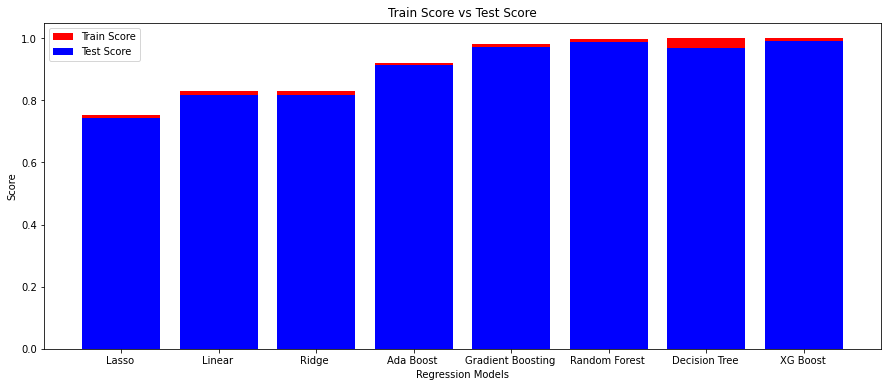

In [36]:
plt.figure(figsize=(15, 6))
plt.bar(x=["Lasso ", "Linear ", "Ridge ", "Ada Boost ", "Gradient Boosting ", "Random Forest ", "Decision Tree ", "XG Boost "], height=[lasso_train_score, lr_train_score, ridge_train_score, abr_train_score, gbr_train_score, rfr_train_score, dtr_train_score, xgb_train_score], color="red", label="Train Score")
plt.bar(x=["Lasso ", "Linear ", "Ridge ", "Ada Boost ", "Gradient Boosting ", "Random Forest ", "Decision Tree ", "XG Boost "], height=[lasso_test_score, lr_test_score, ridge_test_score, abr_test_score, gbr_test_score, rfr_test_score, dtr_test_score, xgb_test_score], color="blue", label="Test Score")
plt.legend()
plt.title("Train Score vs Test Score")
plt.xlabel("Regression Models")
plt.ylabel("Score")
plt.show()


In [37]:
# Thx